In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def row(M):
    c1 = 65
    c2 = 122
    s = ''
    for i in range(M):
        s += chr(c2)
        c2 -= 1
        s += chr(c1)
        c1 += 1
        s += chr(c2)
        s += chr(c1)
        c1 += 1
        s += ','
    s = s[:-3] + chr(122) + chr(c1-1) + '->'
    c1 = 65
    for i in range(M):
        s += chr(c1)
        c1 += 2
    c1 = 66
    for i in range(M):
        s += chr(c1)
        c1 += 2
        
    #print(s)    
    return np.einsum(s,*([T]*M))
    

In [3]:
def column_index_calc(M):
    global s1,s2,st
    s1 = ''.join([chr(65+i) for i in range(M)])
    s2 = ''.join([chr(65+M+i) for i in range(M)])
    s3 = ''.join([chr(65+2*M+i) for i in range(M)])
    st = s1 + s2 + ',' + s2 + s3 + '->' + s1 + s3

In [4]:
def column(Tc,T_row,N):
    if N>2: return column(np.einsum(st,Tc,T_row),T_row,N-1)
    si = s1 + s2 + ',' + s2 + s1 + '->'
    return np.einsum(si,Tc,T_row)

In [5]:
def partition_function(M,N):
    T_row = row(M)
    column_index_calc(M)
    return column(T_row,T_row,N)

In [6]:
Temps = np.linspace(0,5,1001)[1:]
cb = (2,2),(2,3),(2,4),(2,5),(3,3),(3,4),(3,5),(4,4),(4,5),(5,5)

C:\Users\Percy\AppData\Local\Temp\ipykernel_1512\3059555650.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  plt.plot(Temps[1:-1],[-Temps[i]*((r[i+1]-r[i])-(r[i]-r[i-1]))/(dt**2) for i in range(1,l-1)],label=r'$n_x, n_y = $'+f'{x},{y}')


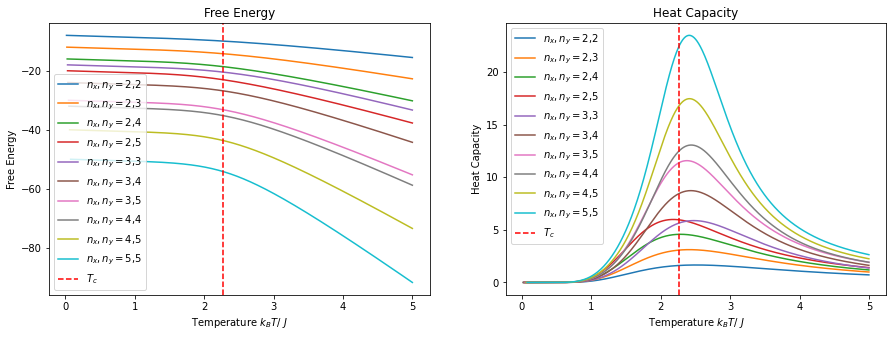

In [7]:
plt.figure(figsize=(15, 5))
dt = Temps[1]-Temps[0]
l = len(Temps)
for x,y in cb:
    r = []
    for Temp in Temps:
        b = np.exp(1/Temp)
        W = np.array([[b, 1.0/b],[1.0/b, b]])
        eigvals, eigvecs = np.linalg.eigh(W)
        sqrt_L = np.diag(np.sqrt(eigvals))
        M = eigvecs @ sqrt_L
        T=np.einsum('si,sj,sk,sl->ijkl',M,M,M,M)
        r.append(-np.log(partition_function(x,y))*Temp)
    plt.subplot(121)
    plt.plot(Temps,r,label=r'$n_x, n_y = $'+f'{x},{y}')
    plt.subplot(122)
    plt.plot(Temps[1:-1],[-Temps[i]*((r[i+1]-r[i])-(r[i]-r[i-1]))/(dt**2) for i in range(1,l-1)],label=r'$n_x, n_y = $'+f'{x},{y}')
plt.subplot(121)
plt.xlabel(r"Temperature $k_BT/\ J$")
plt.ylabel(r"Free Energy")
plt.title("Free Energy")
plt.axvline(x=2.27, color='r', linestyle='--',label = r'$T_c$')
plt.legend()
plt.subplot(122)
plt.xlabel(r"Temperature $k_BT/\ J$")
plt.ylabel(r"Heat Capacity")
plt.title("Heat Capacity")
plt.axvline(x=2.27, color='r', linestyle='--',label = r'$T_c$')
plt.legend()

C:\Users\Percy\AppData\Local\Temp\ipykernel_1512\2130961096.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  plt.plot(Temps[1:-1],[-Temps[i]*((r[i+1]-r[i])-(r[i]-r[i-1]))/(dt**2)/(x*y) for i in range(1,l-1)],label=r'$n_x, n_y = $'+f'{x},{y}')


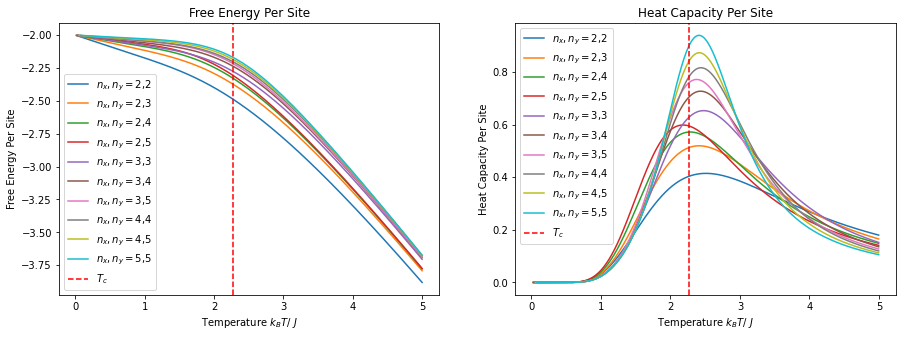

In [8]:
plt.figure(figsize=(15, 5))
dt = Temps[1]-Temps[0]
l = len(Temps)
for x,y in cb:
    r = []
    for Temp in Temps:
        b = np.exp(1/Temp)
        W = np.array([[b, 1.0/b],[1.0/b, b]])
        eigvals, eigvecs = np.linalg.eigh(W)
        sqrt_L = np.diag(np.sqrt(eigvals))
        M = eigvecs @ sqrt_L
        T=np.einsum('si,sj,sk,sl->ijkl',M,M,M,M)
        r.append(-np.log(partition_function(x,y))*Temp)
    plt.subplot(121)
    plt.plot(Temps,[R/(x*y) for R in r],label=r'$n_x, n_y = $'+f'{x},{y}')
    plt.subplot(122)
    plt.plot(Temps[1:-1],[-Temps[i]*((r[i+1]-r[i])-(r[i]-r[i-1]))/(dt**2)/(x*y) for i in range(1,l-1)],label=r'$n_x, n_y = $'+f'{x},{y}')
plt.subplot(121)
plt.xlabel(r"Temperature $k_BT/\ J$")
plt.ylabel(r"Free Energy Per Site")
plt.title("Free Energy Per Site")
plt.axvline(x=2.27, color='r', linestyle='--',label = r'$T_c$')
plt.legend()
plt.subplot(122)
plt.xlabel(r"Temperature $k_BT/\ J$")
plt.ylabel(r"Heat Capacity Per Site")
plt.title("Heat Capacity Per Site")
plt.axvline(x=2.27, color='r', linestyle='--',label = r'$T_c$')
plt.legend()